# 2CSSID-Workshop02. Données, algorithmes et ensembles

## 1. Données

In [1]:
import numpy  as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.23.5', '1.5.3', '3.7.1')

### 1.1. Lecture des données

In [2]:
train = pd.read_csv('data/sat.trn', delimiter=' ', header=None)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [3]:
test = pd.read_csv('data/sat.tst', delimiter=' ', header=None)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [4]:
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:,  -1].values

X_train.shape, Y_train.shape

((4435, 36), (4435,))

In [5]:
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:,  -1].values

X_test.shape, Y_test.shape

((2000, 36), (2000,))

### 1.2. Analyse des données

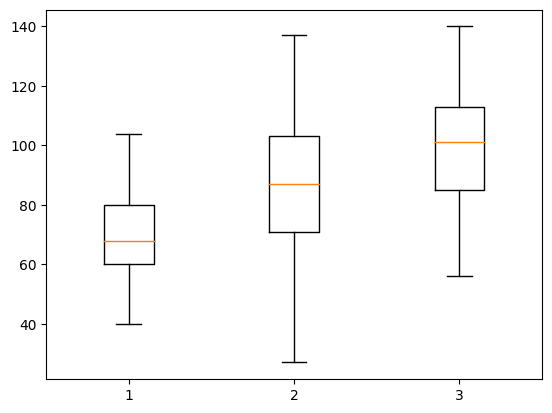

In [6]:
plt.boxplot(X_train[:, :3])
plt.show()

[1072  479  961  415  470 1038]


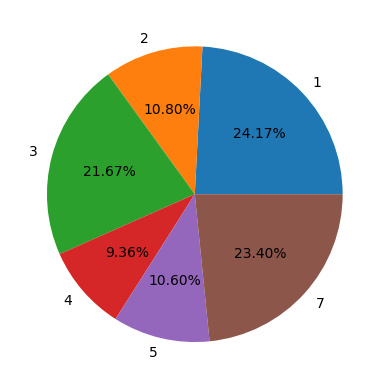

In [7]:
# Trouver le nombre des échantillons de classe du dataset d'entrainement
cls, freq = np.unique(Y_train, return_counts=True)

print(freq)

plt.pie(freq, labels=cls, autopct='%1.2f%%')
plt.show()

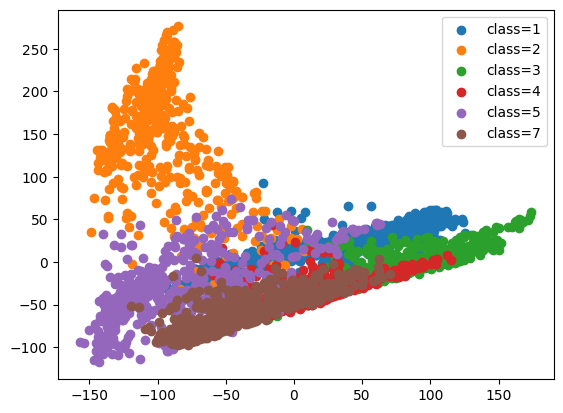

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)

for c in cls:
    idx = Y_train == c
    plt.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], label= 'class=' + str(c))

plt.legend()
plt.show()

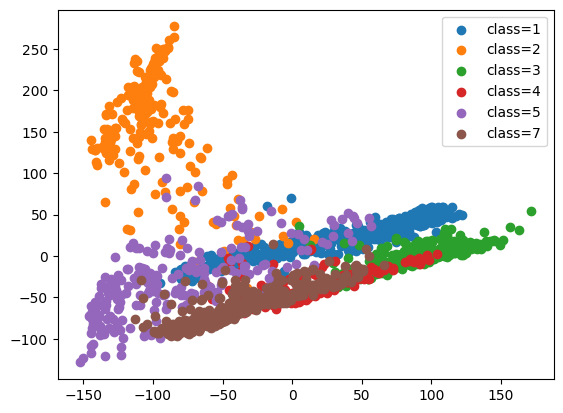

In [9]:
X_test_pca = pca.transform(X_test)

for c in cls:
    idx = Y_test == c
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label= 'class=' + str(c))

plt.legend()
plt.show()

### 1.3. Échantillonnage des données

In [10]:
!pip install imblearn

In [11]:
from imblearn.under_sampling import ClusterCentroids, TomekLinks

cc = ClusterCentroids(random_state=0)
X_cc, Y_cc = cc.fit_resample(X_train, Y_train)

tl = TomekLinks()
X_tl, Y_tl = tl.fit_resample(X_train, Y_train)

np.unique(Y_cc, return_counts=True), np.unique(Y_tl, return_counts=True)

/opt/venv/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/venv/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/venv/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/venv/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/venv/ml/lib/python3.10/site-packages/sklearn/cluster/_k

((array([1, 2, 3, 4, 5, 7]), array([415, 415, 415, 415, 415, 415])),
 (array([1, 2, 3, 4, 5, 7]), array([1065,  473,  939,  415,  449, 1012])))

In [12]:
np.unique(Y_train, return_counts=True)

(array([1, 2, 3, 4, 5, 7]), array([1072,  479,  961,  415,  470, 1038]))

In [13]:
from imblearn.over_sampling import SMOTE#, ADASYN

smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

# adasyn = ADASYN(sampling_strategy='minority')
# X_adasyn, Y_adasyn = adasyn.fit_resample(X_train, Y_train)

np.unique(Y_smote, return_counts=True)#, np.unique(Y_adasyn, return_counts=True)

(array([1, 2, 3, 4, 5, 7]), array([1072, 1072, 1072, 1072, 1072, 1072]))

In [14]:
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score

accuracy_train0 = []
accuracy_test0  = []

data = [
    (X_train, Y_train),
    (X_cc, Y_cc),
    (X_tl, Y_tl),
    (X_smote, Y_smote)
]

for d in data:
    lr = LogisticRegression(solver="liblinear")
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    lr.fit(d[0], d[1])
    
    Y_pred = lr.predict(d[0])
    accuracy_train0.append(accuracy_score(d[1], Y_pred))
    
    # ==================================
    # TEST 
    # ==================================
    Y_pred = lr.predict(X_test)
    accuracy_test0.append(accuracy_score(Y_test, Y_pred))
    

pd.DataFrame({
    'Sampling' : ['original', 'ClusterCentroids', 'TomekLinks', 'SMOTE'],
    "Accuracy entrainement": accuracy_train0,
    "Accuracy test": accuracy_test0
})

,Sampling,Accuracy entrainement,Accuracy test
0,original,0.843067,0.8150
1,ClusterCentroids,0.786747,0.7935
2,TomekLinks,0.846543,0.8130
3,SMOTE,0.819963,0.8200


## 2. Algorithmes

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.ensemble     import RandomForestClassifier
from sklearn.metrics      import accuracy_score
from sklearn.metrics      import f1_score
import timeit


temps_train    = []
temps_test     = []
accuracy_train = []
accuracy_test  = []

models = [
    LogisticRegression(solver="liblinear"), 
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=50)
]

for model in models:
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    temps_debut = timeit.default_timer()
    model.fit(X_train, Y_train)
    temps_train.append(timeit.default_timer() - temps_debut)
    
    Y_pred = model.predict(X_train)
    accuracy_train.append(accuracy_score(Y_train, Y_pred))
    

    # ==================================
    # TEST 
    # ==================================
    temps_debut = timeit.default_timer()
    Y_pred = model.predict(X_test)
    temps_test.append(timeit.default_timer() - temps_debut)
    accuracy_test.append(accuracy_score(Y_test, Y_pred))
    

In [16]:
pd.DataFrame({
    "Alogorithme" : ["Regression logistique", "Naive Bayes", "Arbre de decision", "Forêt aléatoire"],
    "Temps d'entrainement" : temps_train,
    "Temps de test" : temps_test,
    "Accuracy entrainement": accuracy_train,
    "Accuracy test": accuracy_test
})

,Alogorithme,Temps d'entrainement,Temps de test,Accuracy entrainement,Accuracy test
0,Regression logistique,0.473846,0.000237,0.843067,0.8150
1,Naive Bayes,0.002010,0.001197,0.797745,0.7965
2,Arbre de decision,0.068799,0.000401,1.000000,0.8570
3,Forêt aléatoire,0.267226,0.008107,0.999549,0.9080


## 3. Apprentissage ensembliste

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.naive_bayes  import GaussianNB

import timeit
from sklearn.metrics      import accuracy_score

from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import StackingClassifier


temps_train    = []
temps_test     = []
accuracy_train = []
accuracy_test  = []


models = [
    LogisticRegression(solver="liblinear"), 
    GaussianNB(),
    DecisionTreeClassifier()
]

for model in models:
    mdl = BaggingClassifier(estimator=model, n_estimators=10)
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    temps_debut = timeit.default_timer()
    mdl.fit(X_train, Y_train)
    temps_train.append(timeit.default_timer() - temps_debut)
    
    Y_pred = mdl.predict(X_train)
    accuracy_train.append(accuracy_score(Y_train, Y_pred))
    

    # ==================================
    # TEST 
    # ==================================
    temps_debut = timeit.default_timer()
    Y_pred = mdl.predict(X_test)
    temps_test.append(timeit.default_timer() - temps_debut)
    accuracy_test.append(accuracy_score(Y_test, Y_pred))

models = [
    LogisticRegression(solver="liblinear"), 
    GaussianNB(),
    DecisionTreeClassifier()
]

for model in models:
    mdl = AdaBoostClassifier(estimator=model, n_estimators=10)
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    temps_debut = timeit.default_timer()
    mdl.fit(X_train, Y_train)
    temps_train.append(timeit.default_timer() - temps_debut)
    
    Y_pred = mdl.predict(X_train)
    accuracy_train.append(accuracy_score(Y_train, Y_pred))
    

    # ==================================
    # TEST 
    # ==================================
    temps_debut = timeit.default_timer()
    Y_pred = mdl.predict(X_test)
    temps_test.append(timeit.default_timer() - temps_debut)
    accuracy_test.append(accuracy_score(Y_test, Y_pred))


    
models = [
    ("lr", LogisticRegression(solver="liblinear")), 
    ("gnb", GaussianNB()),
    ("dt", DecisionTreeClassifier())
]
mdl = StackingClassifier(estimators=models)
# ==================================
# ENTRAINEMENT 
# ==================================
temps_debut = timeit.default_timer()
mdl.fit(X_train, Y_train)
temps_train.append(timeit.default_timer() - temps_debut)
    
Y_pred = mdl.predict(X_train)
accuracy_train.append(accuracy_score(Y_train, Y_pred))
    

# ==================================
# TEST 
# ==================================
temps_debut = timeit.default_timer()
Y_pred = mdl.predict(X_test)
temps_test.append(timeit.default_timer() - temps_debut)
accuracy_test.append(accuracy_score(Y_test, Y_pred))


In [ ]:
algos = [
    "Regression logistique (Bagging)", 
    "Naive Bayes (Bagging)", 
    "Arbre de decision (Bagging)",
    "Regression logistique (AdaBoost)", 
    "Naive Bayes (AdaBoost)", 
    "Arbre de decision (AdaBoost)",
    "Stacking"
]

pd.DataFrame({
    "Alogorithme" : algos,
    "Temps d'entrainement" : temps_train,
    "Temps de test" : temps_test,
    "Accuracy entrainement": accuracy_train,
    "Accuracy test": accuracy_test
})